##  Homework - Module 1
Solutions for the second ML Zoomcamp homework, a course offered by the DataTalkClub team.


### Getting the data

In [1]:
import pandas as pd
import numpy as np


In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'
!wget  -P ../data $data

--2025-10-07 19:28:49--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8000::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: '../data/car_fuel_efficiency.csv.3'

     0K .......... .......... .......... .......... ..........  5% 1,75M 0s
    50K .......... .......... .......... .......... .......... 11% 22,9M 0s
   100K .......... .......... .......... .......... .......... 17% 20,6M 0s
   150K .......... .......... .......... .......... .......... 23% 19,5M 0s
   200K .......... .......... .......... .......... .......... 29% 3,51M 0s
   250K .......... .......... .......... .......... .......... 35% 7,77M 0s
   300K .......... .......... .......... .......... .......

In [3]:
df = pd.read_csv('../data/car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


### Preparing the dataset
Use only the following columns:

* `'engine_displacement'`
* `'horsepower'`
* `'vehicle_weight'`
* `'model_year'`

In [4]:
df_subset = df[['engine_displacement',
                    'horsepower',
                    'vehicle_weight',
                    'model_year',
                    'fuel_efficiency_mpg']].copy()

### EDA
Look at the fuel_efficiency_mpg variable. Does it have a long tail?

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

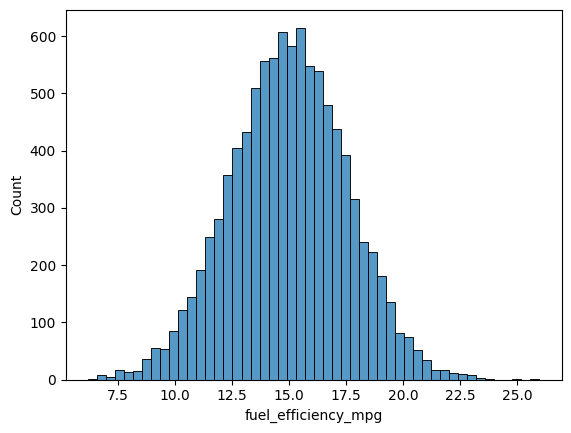

In [6]:
sns.histplot(df_subset.fuel_efficiency_mpg, bins=50)

#### answer: 
No the fuel efficieny mpg colum seems to hve a normal distribuition

### Question 1
There's one column with missing values. What is it?

In [7]:
df_subset.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

#### answer: 
`'horsepower'`

### Question 2
What's the median (50% percentile) for variable `'horsepower'`?

In [8]:
median_hs = df_subset['horsepower'].median()
median_hs

np.float64(149.0)

#### answer: 
149

### Prepare and split the dataset
* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

#### Calculating the subset length:

In [9]:
n = len(df_subset)
n_val = int(len(df_subset) * 0.2)
n_test = int(len(df_subset) * 0.2)
n_train = n - n_val - n_test

n, n_val, n_test, n_train

(9704, 1940, 1940, 5824)

#### shuffle the indices to create evenly distributed subsets

In [10]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [11]:
df_train = df_subset.iloc[idx[:n_train]].copy()
df_val = df_subset.iloc[idx[n_train:n_train + n_val]].copy()
df_test = df_subset.iloc[idx[n_train + n_val:]].copy()

#### Length validation

In [12]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

#### resetting de subsets indices:

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

#### getting the target variables (y):

In [14]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [15]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?
}
Options:

- With 0
- With mean
- Both are equally good

In [16]:
def prepare_with_zero(df):
    df_num = df.fillna(0)
    X =  df_num.values
    return X

In [17]:
def prepare_with_mean(df):
    df_num = df.fillna({'horsepower': df_train['horsepower'].mean()})
    X =  df_num.values
    return X

In [18]:
 def train_linear_regression(X, y):
     ones = np.ones(X.shape[0])
     X = np.column_stack([ones, X])

     XTX = X.T.dot(X)
     XTX_inv = np.linalg.inv(XTX)
     w_full = XTX_inv.dot(X.T).dot(y)
     
     return w_full[0], w_full[1:]

In [19]:
def rmse(y, y_pred):
    se =  (y -  y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

#### With zero:

In [20]:
X_train = prepare_with_zero(df_train)
w0, w = train_linear_regression(X_train, y_train)

# validation part:
X_val = prepare_with_zero(df_val)
y_pred = w0 + X_val.dot(w)

rmse_value = rmse(y_val, y_pred)
round(rmse_value, 2)

np.float64(0.52)

#### With mean:

In [21]:
X_train = prepare_with_mean(df_train)
w0, w = train_linear_regression(X_train, y_train)

# validation part:
X_val = prepare_with_mean(df_val)
y_pred = w0 + X_val.dot(w)

rmse_value = rmse(y_val, y_pred)
round(rmse_value, 2)

np.float64(0.46)

#### answer: 
with mean

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If multiple options give the same best RMSE, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [22]:
def train_linear_regression_reg(X, y, r):
     ones = np.ones(X.shape[0])
     X = np.column_stack([ones, X])

     XTX = X.T.dot(X)
     XTX = XTX + r * np.eye(XTX.shape[0])
     XTX_inv = np.linalg.inv(XTX)
     w_full = XTX_inv.dot(X.T).dot(y)
     
     return w_full[0], w_full[1:]

In [23]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = {}

In [24]:
X_train = prepare_with_zero(df_train)
X_val = prepare_with_zero(df_val)

In [25]:
for r in r_values:
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    y_pred = w0 + X_val.dot(w)
    rmse_value = rmse(y_val, y_pred)
    rmse_scores[r] = round(rmse_value, 2)

In [26]:
rmse_scores

{0: np.float64(0.52),
 0.01: np.float64(0.52),
 0.1: np.float64(0.52),
 1: np.float64(0.52),
 5: np.float64(0.52),
 10: np.float64(0.52),
 100: np.float64(0.52)}

#### answer:
all equal, let´s choose 0

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600

In [27]:
seeds = list(range(10))
rmse_scores = []

In [28]:
for seed in seeds: 
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    df_train = df_subset.iloc[idx[:n_train]].copy()
    df_val = df_subset.iloc[idx[n_train:n_train+n_val]].copy()
    df_test = df_subset.iloc[idx[n_train+n_val:]].copy()
    
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    
    X_train = prepare_with_zero(df_train)
    X_val = prepare_with_zero(df_val)
    

    w0, w = train_linear_regression(X_train, y_train)
    
    
    y_pred = w0 + X_val.dot(w)
    rmse_scores.append(rmse(y_val, y_pred))


std_rmse = round(np.std(rmse_scores), 3)
print("Standard deviation of RMSE for different seeds:", std_rmse)

Standard deviation of RMSE for different seeds: 0.007


#### answer:
Following the instructions: "If your answer doesn't match the options exactly, select the closest one": 0.006

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.15
- 0.515
- 5.15
- 51.5

In [29]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df_subset.iloc[idx[:n_train]].copy()
df_val = df_subset.iloc[idx[n_train:n_train + n_val]].copy()
df_test = df_subset.iloc[idx[n_train + n_val:]].copy()

In [40]:
df_train_val = pd.concat([df_train, df_val]).reset_index(drop=True)

y_train_val = df_train_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

y_train_val

array([10.30469994, 13.47943378, 16.19065297, ..., 13.67814034,
       17.59323665, 16.06897494], shape=(7764,))

In [32]:
X_train_val = prepare_with_zero(df_train_val)
X_test = prepare_with_zero(df_test)

w0, w = train_linear_regression_reg(X_train_val, y_train_val, r=0.001)

In [33]:
y_pred = w0 + X_test.dot(w)


rmse_value = rmse(y_test, y_pred)
round(rmse_value, 3)

np.float64(0.516)

#### answer:
Following the instructions: "If your answer doesn't match the options exactly, select the closest one": 0.515